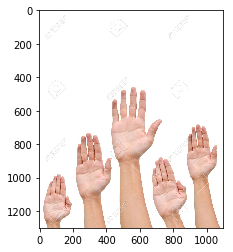

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

# Read in the image
image = cv2.imread('images/raised_hand.jpg')

# make copy
image_copy = np.copy(image)

# change color to RGB
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

plt.imshow(image_copy)

## Produce a binary image for finding contours

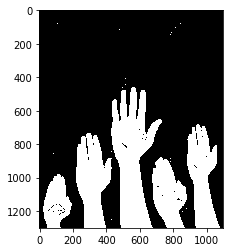

In [12]:
# convert the image to gray scale
gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)

# Create a binary threashold image 
retval, binary = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)

plt.imshow(binary, cmap='gray')

## Find and draw the contours

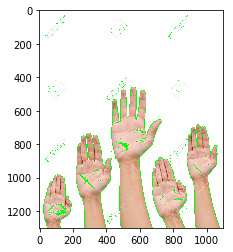

In [13]:
# find controus from thresholded image
retval, contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
## contour retrieval mode, counter approximation method
## hierarchy : relationship with one another

image_copy2 = np.copy(image_copy)
# draw all countrous on a copy of the image
all_countours = cv2.drawContours(image_copy2, contours, -1, (0, 255, 0), 2)

plt.imshow(all_countours)

# Contour Features 2 

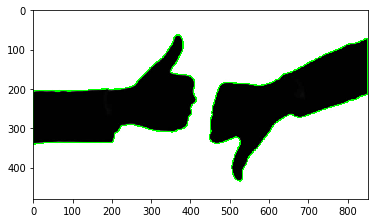

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Read in an image and convert to RGB
image = cv2.imread('images/6.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert to grayscale
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
# Create a binary thresholded image
retval, binary = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)

# Find contours from thresholded image
retval, contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw all contours on a copy of the original image
contour_image = np.copy(image)
cv2.drawContours(contour_image, contours, -1, (0,255,0), 2)
plt.imshow(contour_image)

In [28]:
def orientations(contours):
    """
    Orientation 
    :param cnt: a list of contours
    :return: the orientations of the contours
    """
    
    # Create an empty list to store the angles in
    # Tip: Use angles.append(value) to add values to this list
    angles = []
    for contour in contours:
        # print(contour) : set of array
        (x,y), (MA,ma), angle = cv2.fitEllipse(contour)
        print(angle)
        angles.append(angle)
    return angles
    


# ---------------------------------------------------------- #
# Print out the orientation values
angles = orientations(contours)
print('Angles of each contour (in degrees): ' + str(angles))



60.5482673645
71.1507492065
Angles of each contour (in degrees): [60.54826736450195, 71.15074920654297]


## Contours Not working

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Read in an image and convert to RGB
image = cv2.imread('images/6.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert to grayscale
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
# Create a binary thresholded image
retval, binary = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)

# Find contours from thresholded image
retval, contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw all contours on a copy of the original image
contour_image = np.copy(image)
cv2.drawContours(contour_image, contours, -1, (0,255,0), 2)
plt.imshow(contour_image)

def orientations(contours):
    """
    Orientation 
    :param cnt: a list of contours
    :return: the orientations of the contours
    """
    
    # Create an empty list to store the angles in
    # Tip: Use angles.append(value) to add values to this list
    angles = []
    for contour in contours:
        # print(contour) : set of array
        (x,y), (MA,ma), angle = cv2.fitEllipse(contour)
        print(angle)
        angles.append(angle)
    return angles
    
# ---------------------------------------------------------- #
# Print out the orientation values
angles = orientations(contours)
print('Angles of each contour (in degrees): ' + str(angles))

